In [209]:
#Importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor


In [210]:
df = pd.read_csv("loan.csv")#Téléchargement de notre dataset
df.head(10)#affichage de 10 premières lignes

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
5,24,Female,Nurse,Associate's,Single,48000,640,Denied
6,42,Male,Lawyer,Doctoral,Married,120000,790,Approved
7,29,Female,Artist,Bachelor's,Single,38000,620,Denied
8,37,Male,IT,Master's,Married,92000,750,Approved
9,48,Female,Doctor,Doctoral,Married,180000,820,Approved


In [211]:
#On remarque et on distingue notre variable cible "Loan_status"

In [212]:
df.info()# AFfichage des informations générales sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [213]:
df.isna().sum()#pas de valeur manquante pour nos variable

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [214]:
#affichage de valeurs unique de nos variables 
df["age"].unique()

array([32, 45, 28, 51, 36, 24, 42, 29, 37, 48, 55, 31, 26, 39, 44, 27, 34,
       41, 30, 53, 38, 25, 46, 33, 40, 35, 43, 49, 54, 47, 52, 50],
      dtype=int64)

In [215]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [216]:
df["occupation"].unique ()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [217]:
df["education_level"].unique()

array(["Bachelor's", "Master's", 'High School', "Associate's", 'Doctoral'],
      dtype=object)

In [218]:
df["marital_status"].unique()
   

array(['Married', 'Single'], dtype=object)

In [219]:
df["credit_score"].unique()

array([720, 680, 590, 780, 710, 640, 790, 620, 750, 820, 770, 690, 610,
       730, 760, 650, 740, 800, 700, 580, 630, 670, 600, 810, 570, 560,
       660, 830], dtype=int64)

In [220]:
df["income"].unique()

array([ 85000,  62000,  25000, 105000,  75000,  48000, 120000,  38000,
        92000, 180000, 110000,  68000,  42000,  78000,  95000,  52000,
        88000, 125000,  72000,  98000,  80000,  35000, 115000,  45000,
        60000,  70000,  90000,  55000,  65000,  40000, 140000,  30000,
       100000,  28000,  82000,  58000,  50000, 130000, 175000,  32000],
      dtype=int64)

In [221]:
df["loan_status"].unique()

array(['Approved', 'Denied'], dtype=object)

Notre jeu de donnée est propre sans valeur manquante et bien structuré. Il nous reste que à réaliser de l'encodage pour nos variable object pour les rendre numérique.

<Figure size 1000x1000 with 0 Axes>

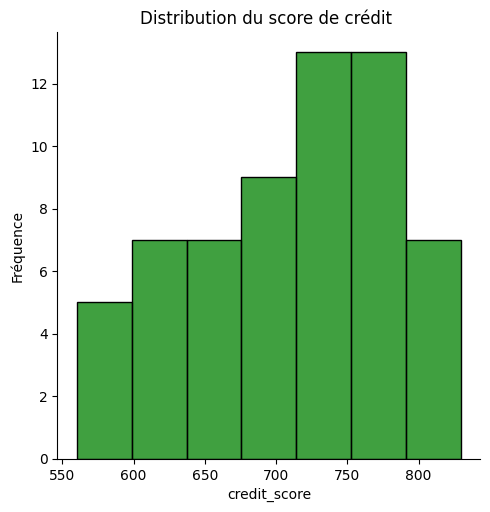

In [222]:
plt.figure(figsize= (10,10))
sns.displot(df["credit_score"], color = "g", )
plt.title("Distribution du score de crédit ", color = "k");
plt.xlabel("credit_score")
plt.ylabel("Fréquence")
plt.show()

C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3935544577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= "loan_status", palette= "viridis", legend= False);


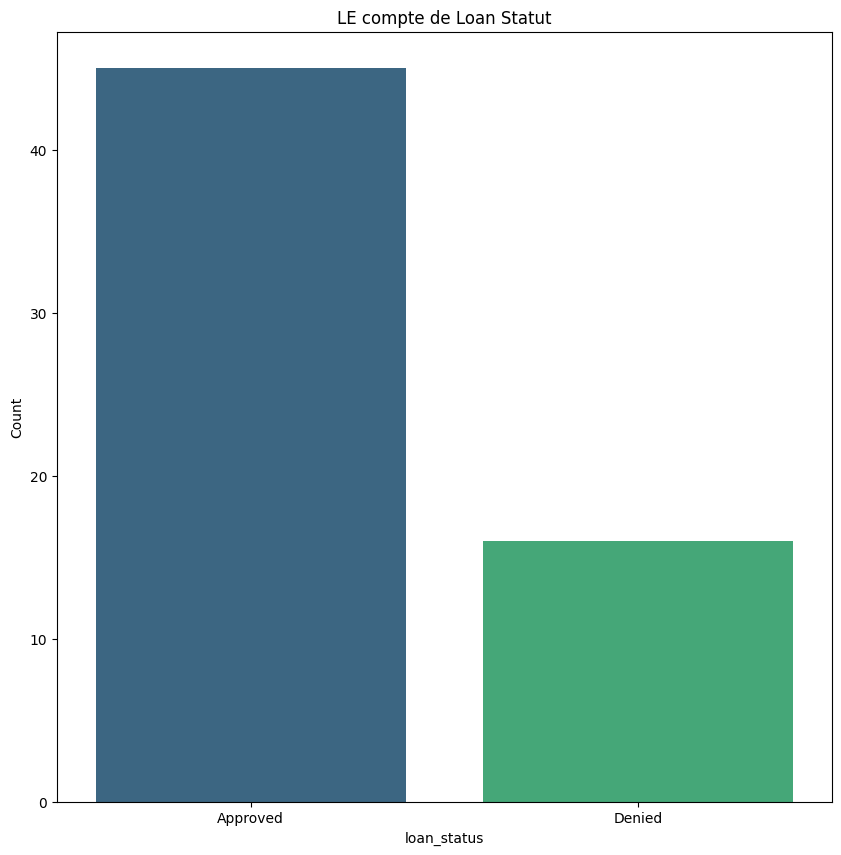

In [223]:
plt.figure(figsize= (10,10))
plt.title("LE compte de Loan Statut")
sns.countplot(data = df, x= "loan_status", palette= "viridis", legend= False);
plt.xlabel("loan_status")
plt.ylabel("Count")
plt.show()

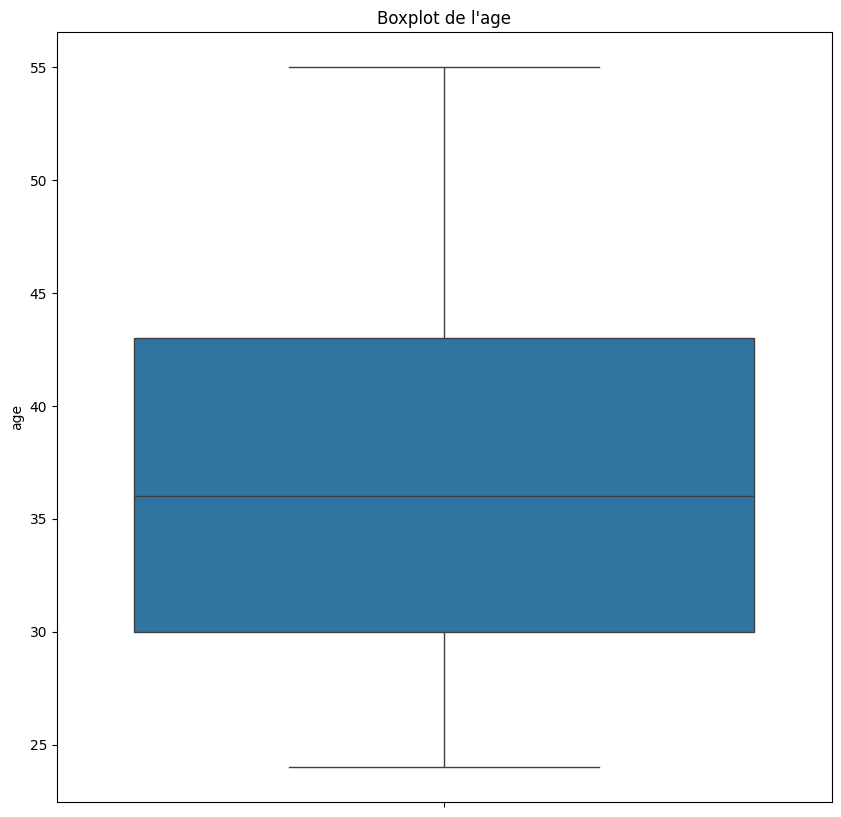

In [224]:
plt.figure(figsize= (10,10))
plt.title ("Boxplot de l'age")
sns.boxplot(df["age"]);

C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3596832582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income', palette="viridis")


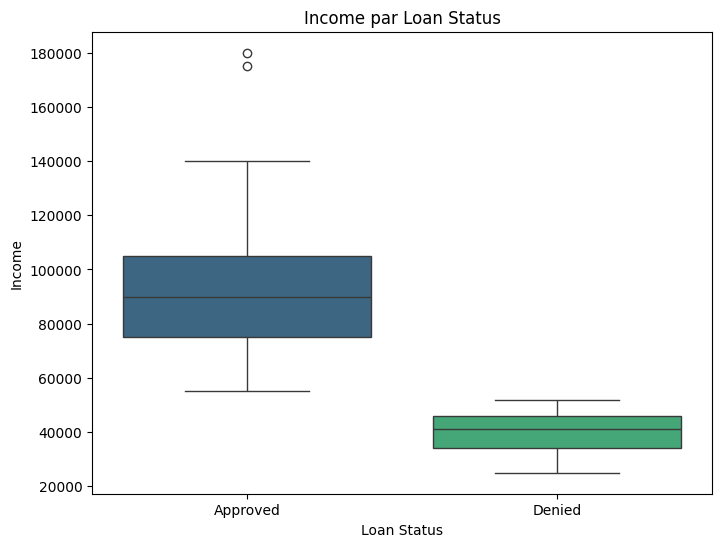

In [225]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='income', palette="viridis")
plt.title('Income par Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

Text(0.5, 1.0, 'Attribusion du crédit selon le genre')

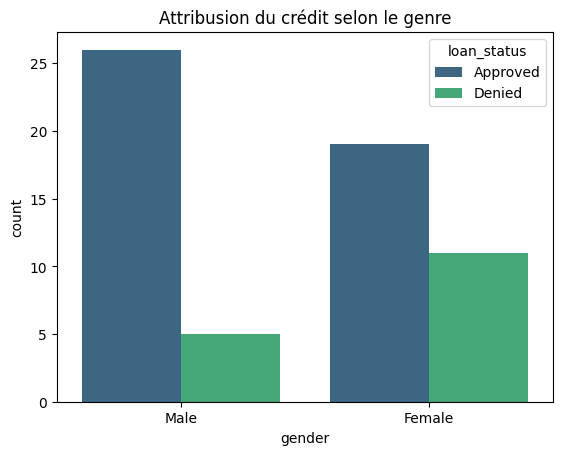

In [226]:
sns.countplot(data= df, x= "gender", hue= "loan_status", palette= "viridis" );
plt.title ("Attribusion du crédit selon le genre")

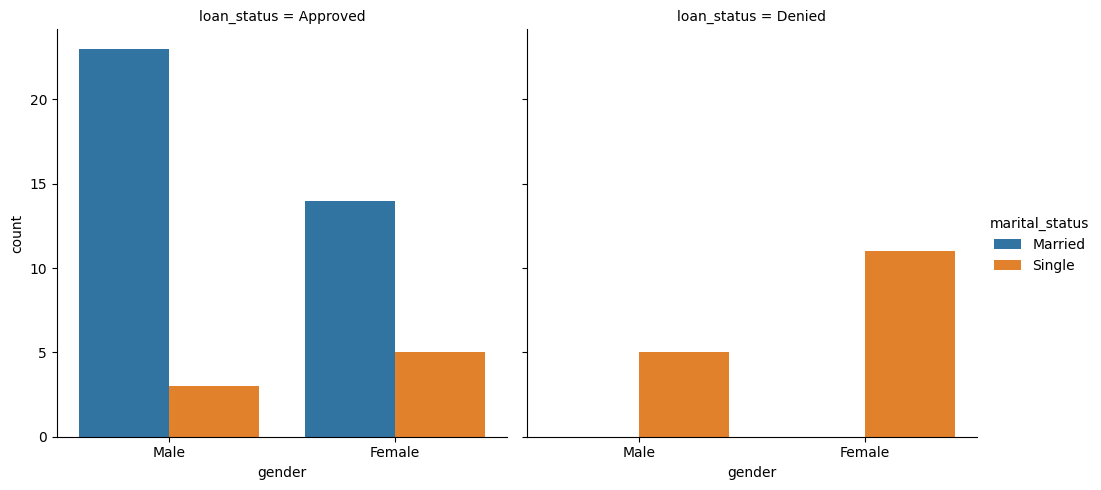

In [227]:

sns.catplot(data=df, x="gender", hue="marital_status", col="loan_status", kind="count")



Text(0.5, 1.0, 'Crédit accordé selon le genre Gender')

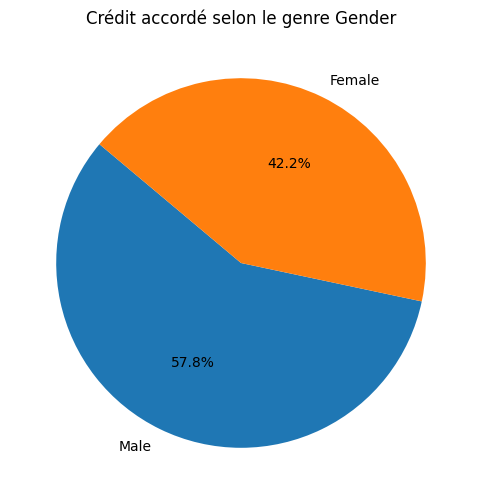

In [242]:
# Filtrer les prêts approuvés
approved_loans = df[df['loan_status'] == 'Approved']

# Calculer les pourcentages par catégorie
loan_counts_gender = approved_loans['gender'].value_counts()

# Créer le graphique en secteurs pour gender
plt.figure(figsize=(12, 6))

plt.pie(loan_counts_gender, labels=loan_counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Crédit accordé selon le genre Gender')



Text(0.5, 1.0, 'Crédit accordé selon le genre Gender')

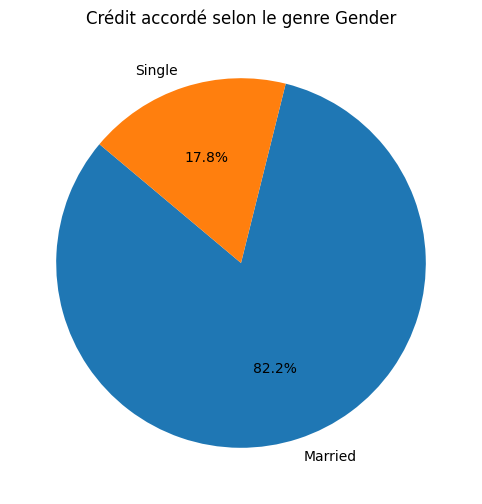

In [243]:
# Filtrer les prêts approuvés
approved_loans = df[df['loan_status'] == 'Approved']

# Calculer les pourcentages par catégorie
loan_counts_gender = approved_loans['marital_status'].value_counts()


# Créer le graphique en secteurs pour gender
plt.figure(figsize=(12, 6))

plt.pie(loan_counts_gender, labels=loan_counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('crédit accordé pour les cituation familliale')

### encodage des variable catégorielles 

In [229]:
# Remplacez les valeurs 'Male' par 1 et 'Female' par 0 dans la colonne 'gender'
df['gender'].replace({'Male': 1, 'Female': 0})


C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\620926970.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Male': 1, 'Female': 0})


0     1
1     0
2     1
3     0
4     1
     ..
56    1
57    0
58    1
59    0
60    1
Name: gender, Length: 61, dtype: int64

In [230]:
# Remplacez les valeurs 'Married' par 1 et 'Single' par 0 dans la colonne 'marital_status'
df['marital_status'].replace({'Married': 1, 'Single': 0},)


C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\475012483.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marital_status'].replace({'Married': 1, 'Single': 0},)


0     1
1     0
2     0
3     1
4     1
     ..
56    1
57    0
58    1
59    0
60    1
Name: marital_status, Length: 61, dtype: int64

In [231]:
# Remplacez les valeurs 'Approved' par 1 et 'Denied' par 0 dans la colonne 'loan_status'
df['loan_status'].replace({'Approved': 1, 'Denied': 0},)


C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3542472965.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'].replace({'Approved': 1, 'Denied': 0},)


0     1
1     1
2     0
3     1
4     1
     ..
56    1
57    0
58    1
59    1
60    1
Name: loan_status, Length: 61, dtype: int64

In [232]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
